This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Heuristic clutter detection based on distribution properties ("histo cut")

Detects areas with anomalously low or high average reflectivity or precipitation. It is recommended to use long term average or sums (months to year).

In [1]:
import wradlib.clutter as clutter
from wradlib.vis import plot_ppi
import wradlib.util as util
import numpy as np
import matplotlib.pyplot as pl
import warnings

warnings.filterwarnings("ignore")
try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    pl.ion()

/home/runner/micromamba-root/envs/wradlib-tests/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load annual rainfall acummulation example (from DWD radar Feldberg)

In [2]:
filename = util.get_wradlib_data_file("misc/annual_rainfall_fbg.gz")
yearsum = np.loadtxt(filename)

### Apply histo-cut filter to retrieve boolean array that highlights clutter as well as beam blockage

Depending on your data and climate you can parameterize the upper and lower frequency percentage with the kwargs `upper_frequency`/`lower_frequency`. For European ODIM_H5 data these values have been found to be in the order of 0.05 in [EURADCLIM: The European climatological high-resolution gauge-adjusted radar precipitation dataset](https://essd.copernicus.org/preprints/essd-2022-334/). The current default is 0.01 for both values.

In [3]:
mask = clutter.histo_cut(yearsum)

### Plot results

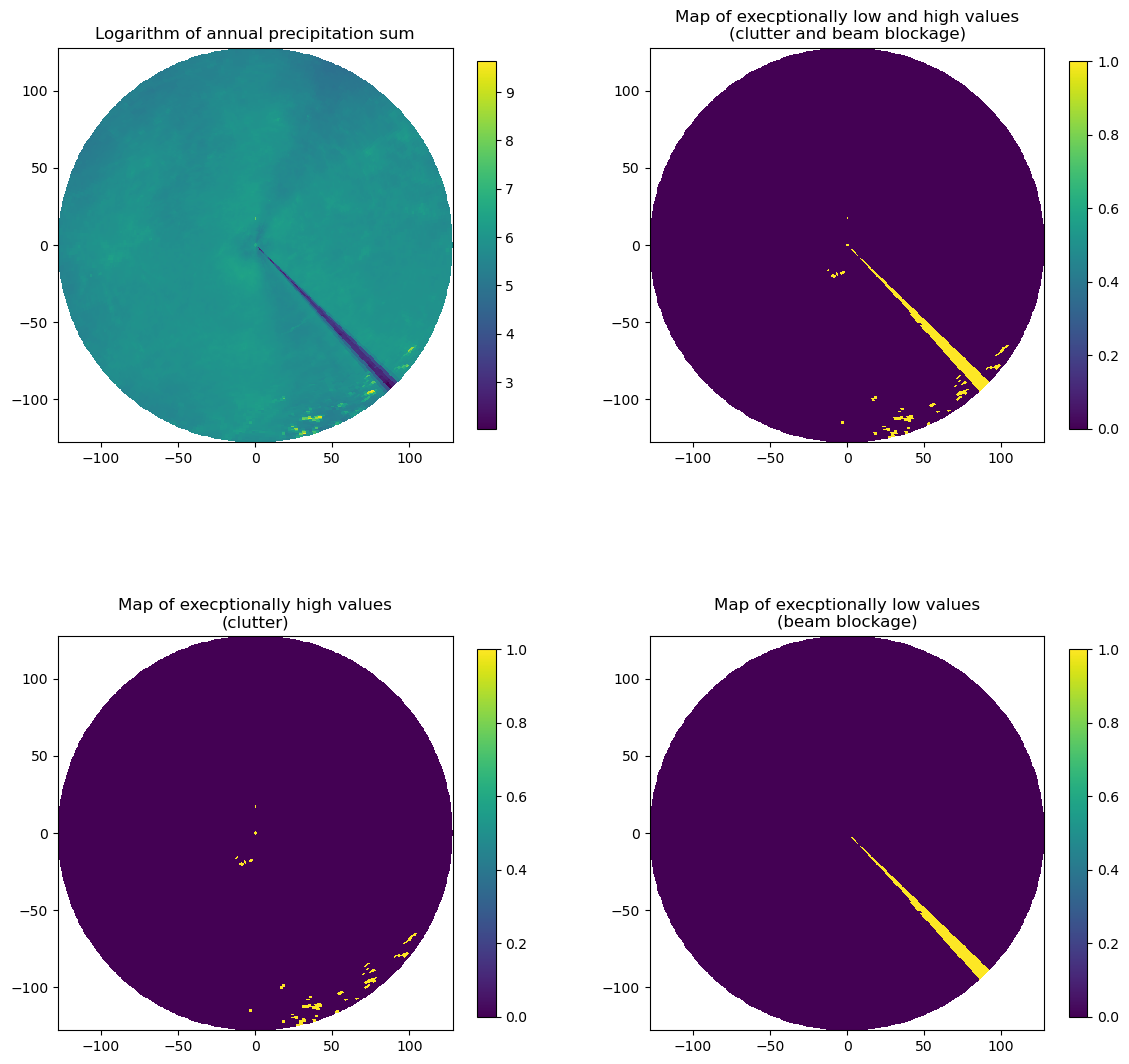

In [4]:
fig = pl.figure(figsize=(14, 14))
ax = fig.add_subplot(221)
ax, pm = plot_ppi(np.log(yearsum), ax=ax)
pl.title("Logarithm of annual precipitation sum")
pl.colorbar(pm, shrink=0.75)
ax = fig.add_subplot(222)
ax, pm = plot_ppi(mask.astype(bool), ax=ax)
pl.title("Map of execptionally low and high values\n(clutter and beam blockage)")
pl.colorbar(pm, shrink=0.75)
ax = fig.add_subplot(223)
ax, pm = plot_ppi(mask == 1, ax=ax)
pl.title("Map of execptionally high values\n(clutter)")
pl.colorbar(pm, shrink=0.75)
ax = fig.add_subplot(224)
ax, pm = plot_ppi(mask == 2, ax=ax)
pl.title("Map of execptionally low values\n(beam blockage)")
pl.colorbar(pm, shrink=0.75)